In [468]:
import random
import math
import matplotlib.pyplot as plt
import pylab
import pandas as pd
import numpy as np
import statistics
import scipy.stats as st

# 1. and 2.
# Initilize values 

In [469]:
X = 6
Y = 5
Z = 4
n = 2**X
w = 2**Y

# 3. Create time series files of length n

In [456]:
# results = []
# for _ in range(n):
#     random_number = "{0:.2f}".format(random.uniform(0, X))
#     results.append(random_number)
# outfile = open('test2.txt', 'w+')
# outfile.write("\n".join(results))
# outfile.close()

# Load both time series

In [470]:
with open('file1.txt') as f:
    ts1 = f.read().splitlines()
ts1 = [float(x) for x in ts1]

with open('file2.txt') as f:
    ts2 = f.read().splitlines()
ts2 = [float(x) for x in ts2]

# Plot the original time series data

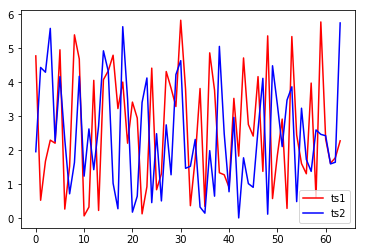

In [471]:
plt.plot(ts1,'r',label = 'ts1')
plt.plot(ts2,'b',label = 'ts2')
pylab.legend()
plt.show()

# 4. Z-normalize both Time series

In [472]:
def z_normalize(ts):
    z_mean = statistics.mean(ts)
    z_sd = statistics.pstdev(ts)
    return [(x-z_mean)/z_sd for x in ts]

In [475]:
z1 = z_normalize(ts1)
z2 = z_normalize(ts2)

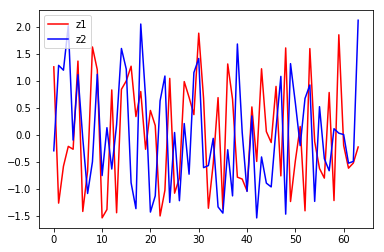

In [476]:
plt.plot(z1,'r',label = 'z1')
plt.plot(z2,'b',label = 'z2')
pylab.legend()
plt.show()

# 5. convert both Time Series into SAX string
# First, convert to PAA

In [477]:
def PAA(ts, M):
    n = len(ts)
    chunk_size = float(n) / M
    step = int(math.ceil(chunk_size))
    res = [0]*M
    loop = 0
    ptr = int(loop * chunk_size)
    for i in range(n*M):
        idx = int(i/n)
        pos = int(i/M)
        res[idx] = res[idx] + ts[pos]
         
    for i in range(M):
        res[i] = res[i] / n
    return res

In [496]:
paa1 = PAA(z1,2**Y)
paa2 = PAA(z2,2**Y)
paa1 = [round(x,2) for x in paa1]
paa2 = [round(x,2) for x in paa2]

# Create breakpoints

In [497]:
breakpoints = [0]*(Z-1)
for i in range(len(breakpoints)):
    area_size = (i+1)/Z
    breakpoints[i] = st.norm.ppf(area_size)

# Mapping, PAA -> Alphabets

In [498]:
def map_to_alphabets(num,breakpoints,alphabets):
    for i in range(len(breakpoints)):
        if num < breakpoints[i]:
            return alphabets[i]
    return alphabets[i+1]        

In [499]:
alphabets = ('a','b','c','d')
SAX_A = []
SAX_B = [] 
for num in paa1 :
    SAX_A.append(map_to_alphabets(num,breakpoints,alphabets))
for num in paa2 :
    SAX_B.append(map_to_alphabets(num,breakpoints,alphabets))

In [398]:
''.join(SAX_A)

'bbcadabddccabccdabdabcbccbcbbcbb'

In [502]:
''.join(SAX_A)

'cbcadabddccabccdabdabcbccbcbbcbb'

# 6. Calculate a distance between SAX_A and SAX_B

# Create a lookup table for the distances

In [503]:
distances_table = np.zeros(shape=(Z,Z))
for r in range(Z):
    for c in range (Z):
        if (abs(r-c) > 1):
            distances_table[r][c] = breakpoints[max(r,c)-1] - breakpoints[min(r,c)]

In [504]:
def character_distance(c1,c2,table):
    return table[ord(c1)-ord('a')][ord(c2)-ord('a')]

In [506]:
dist = 0
for i in range(len(SAX_A)):
    c1 = SAX_A[i]
    c2 = SAX_B[i]
    dist+=  character_distance(c1,c2,distances_table)
    count +=1
dist

8.0938770023529809

32